<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Standard-SVM-VS-Weighted-SVM" data-toc-modified-id="Standard-SVM-VS-Weighted-SVM-1">Standard SVM <font color="red">VS</font> Weighted SVM</a></span><ul class="toc-item"><li><span><a href="#Applying-standard-linear-SVM" data-toc-modified-id="Applying-standard-linear-SVM-1.1">Applying standard linear SVM</a></span></li><li><span><a href="#let's-try-with-the-modified-class-weights-according-to-the-data." data-toc-modified-id="let's-try-with-the-modified-class-weights-according-to-the-data.-1.2">let's try with the modified class weights according to the data.</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-1.3"><u>Observations</u></a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Standard SVM <font color='red'>VS</font> Weighted SVM

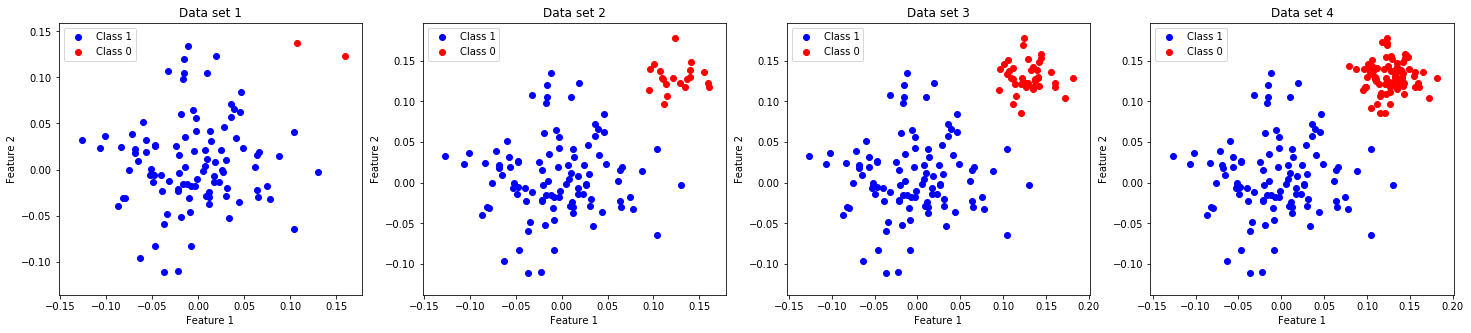

In [2]:
# Here we are creating 2d data sets (total 4 sets) 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(25,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    np.random.seed(111)
    X_p=np.random.normal(0,0.05,size=(i[0],2)) #Generating feature values for positive class
    np.random.seed(111)
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) #Generating feature values for negative class
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1],color='blue',label='Class 1')
    plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Class 0')
    plt.title('Data set {}'.format(j+1))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
plt.show()

In [3]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([
        [((-coef[0][1]*mi - intercept)/coef[0][0]), mi],
        [((-coef[0][1]*ma - intercept)/coef[0][0]), ma]
                    ])
    plt.plot(points[:,0], points[:,1],label='Class seperating s.t line',color='red')

In [4]:
def make_meshgrid(x, y, h=.1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 2*h, x.max() + 2*h
    y_min, y_max = y.min() - 2*h, y.max() + 2*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Applying standard linear SVM

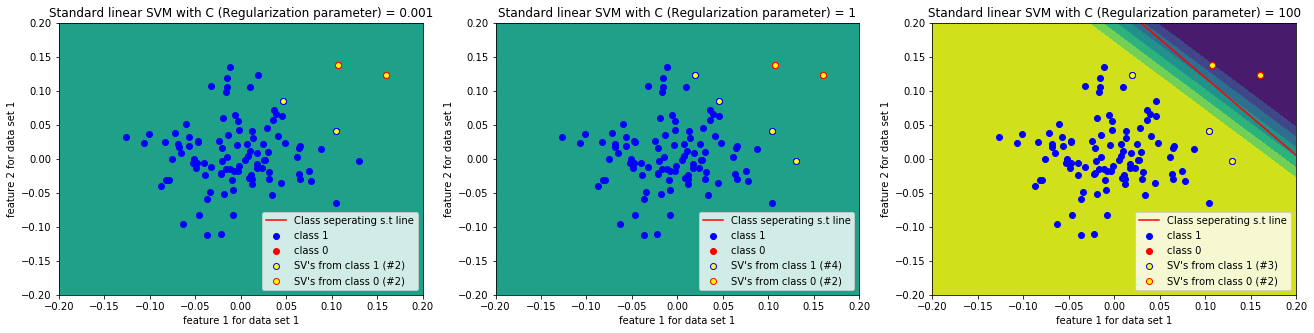

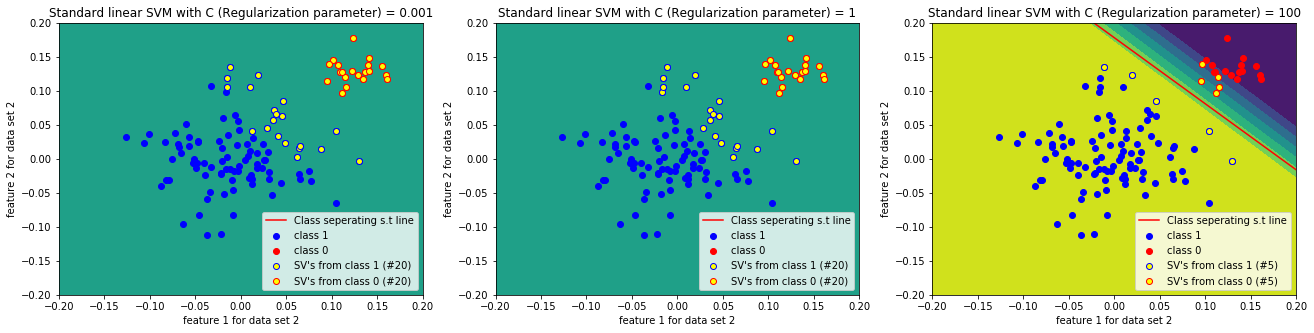

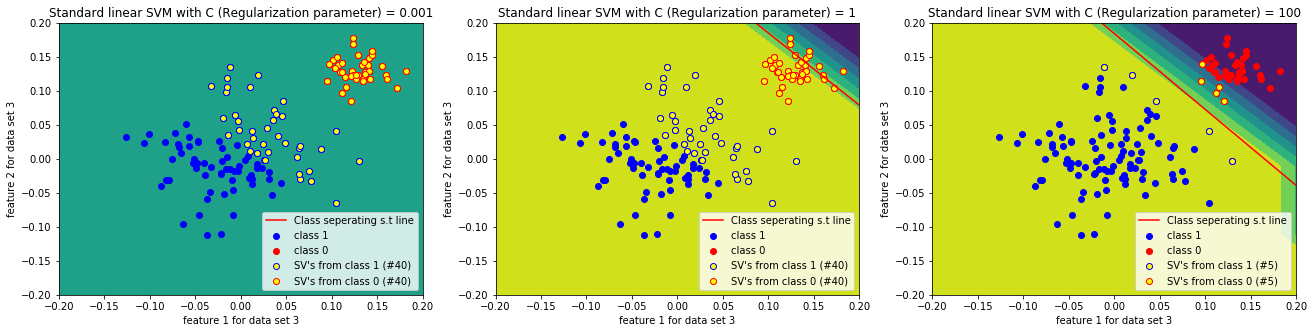

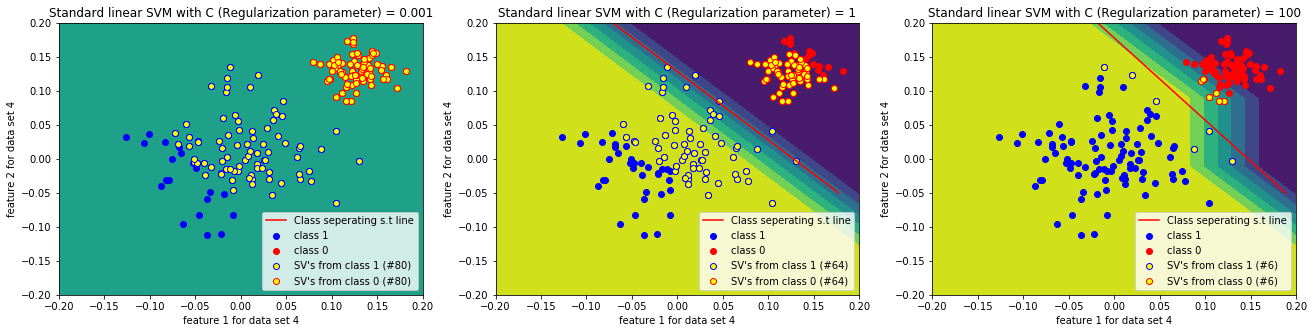

In [5]:
LR=[0.001, 1, 100] #the regularization strengths


for no_,i in enumerate(ratios):
    # Creating data sets (using Same code that shown above)
    plt.figure(figsize=(30,5))
    np.random.seed(111)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    np.random.seed(111)
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    # Data is ready by this time
    #-------------------------------------------------------
    xx,yy=make_meshgrid(X[:,0],X[:,1])
    for j,k in enumerate(LR): # study the model at different regularization strengths
        plt.subplot(1, 4, j+1)
        clf=SVC(kernel='linear', C=k).fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax=plt.gca()
        ax.contourf(xx, yy, Z)
        #ax.contourf(xx, yy, Z,colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['**', '-', '--'])
        plt.scatter(X_p[:,0],X_p[:,1],color='blue',label='class 1')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='class 0')
        plt.xlabel('feature 1 for data set {0}'.format(no_+1))
        plt.ylabel('feature 2 for data set {0}'.format(no_+1))
        plt.title('Standard linear SVM with C (Regularization parameter) = {0}'.format(k))
        ax.set_xlim(-0.2, 0.2) 
        #The class seperating plane may not visible in some plots with this constrained x axis limits 
        # In this case all the points are classified as majority class by the model 
        ax.set_ylim(-0.2, 0.2)
        
        index_=clf.support_
        class_0_index=[]
        class_1_index=[]
        for idx in index_:
            if(y[idx]==0): class_0_index.append(idx)
            else: class_1_index.append(idx)
                
        plt.scatter(X[class_1_index,0],X[class_1_index,1],color='yellow',edgecolors='blue',label='SV\'s from class 1 (#'+str(clf.n_support_[1])+')')
        plt.scatter(X[class_0_index,0],X[class_0_index,1],color='yellow',edgecolors='red',label='SV\'s from class 0 (#'+str(clf.n_support_[0])+')')
        draw_line(clf.coef_,clf.intercept_, -0.05, 0.2)
        plt.legend()
    plt.show()

## let's try with the modified class weights according to the data.

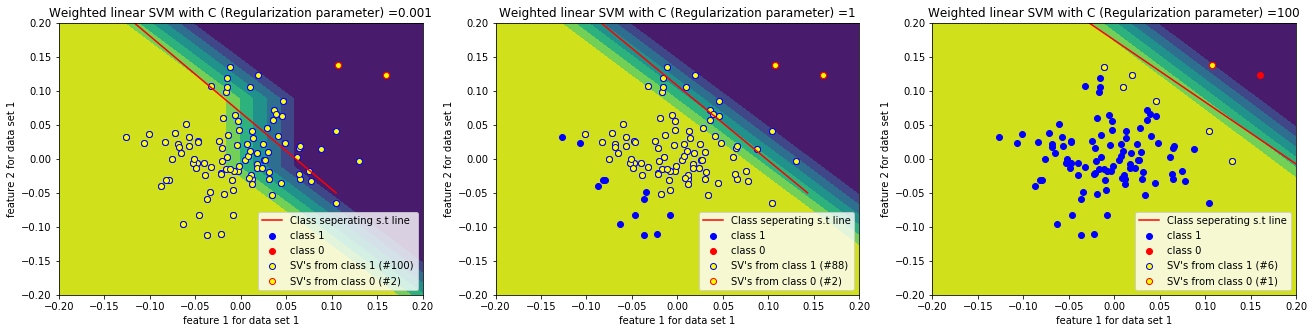

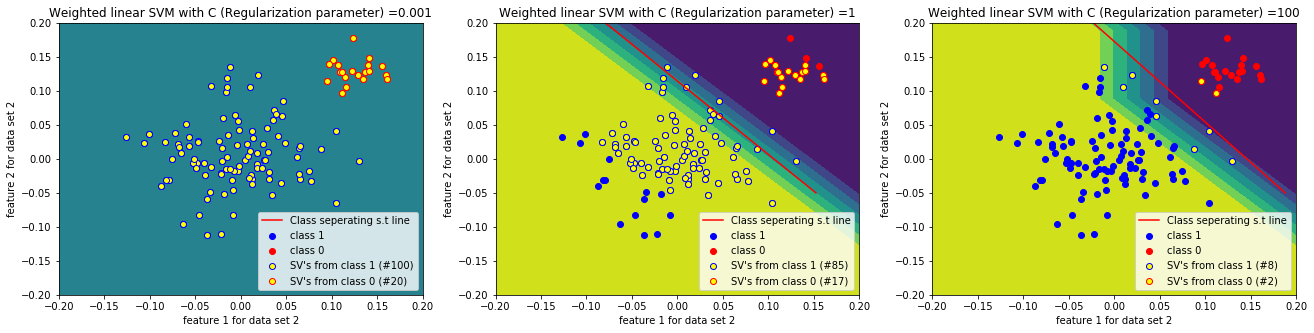

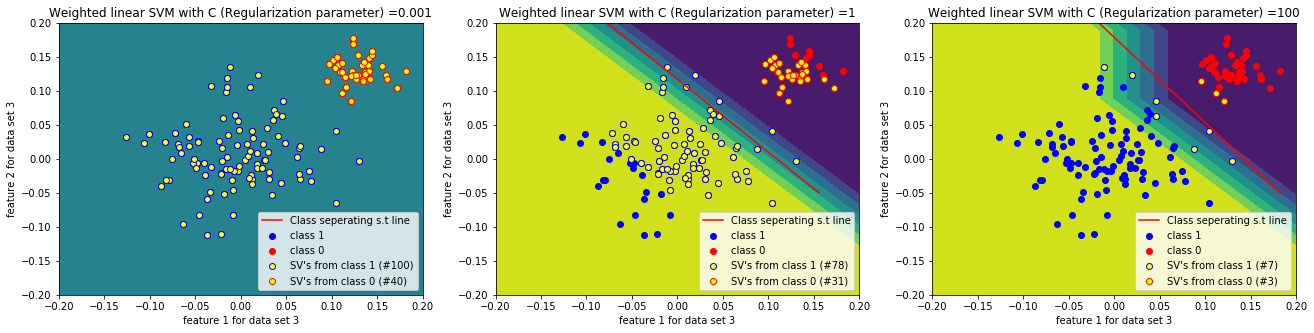

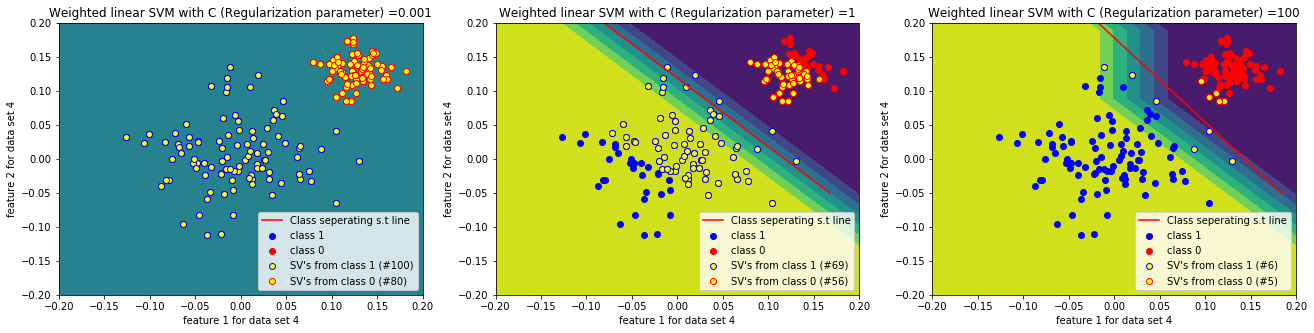

In [6]:
LR=[0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

for no_,i in enumerate(ratios):
    plt.figure(figsize=(30,5))
    np.random.seed(111)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    np.random.seed(111)
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    xx,yy=make_meshgrid(X[:,0],X[:,1])
    for j,k in enumerate(LR):
        plt.subplot(1, 4, j+1)
        clf=SVC(kernel='linear',C=k, class_weight='balanced').fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        ax=plt.gca()
        ax.contourf(xx, yy, Z)
        #ax.contourf(xx, yy, Z,colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['**', '-', '--'])
        
        plt.scatter(X_p[:,0],X_p[:,1],color='blue',label='class 1')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='class 0')
        plt.xlabel('feature 1 for data set {0}'.format(no_+1))
        plt.ylabel('feature 2 for data set {0}'.format(no_+1))
        plt.title('Weighted linear SVM with C (Regularization parameter) ={0}'.format(k))
        ax.set_xlim(-0.2, 0.2)
        ax.set_ylim(-0.2, 0.2)
        
        index_=clf.support_
        class_0_index=[]
        class_1_index=[]
        for idx in index_:
            if(y[idx]==0): class_0_index.append(idx)
            else: class_1_index.append(idx)
                
        plt.scatter(X[class_1_index,0],X[class_1_index,1],color='yellow',edgecolors='blue',label='SV\'s from class 1 (#'+str(clf.n_support_[1])+')')
        plt.scatter(X[class_0_index,0],X[class_0_index,1],color='yellow',edgecolors='red',label='SV\'s from class 0 (#'+str(clf.n_support_[0])+')')
        draw_line(clf.coef_,clf.intercept_, -0.05, 0.2)
        plt.legend()
    plt.show()

## <u>Observations</u>

- In the weighted SVM case the # of SV's are proportional to the # samples in a class. In the earlier case the # of SV's from each class are almost same every time, irrespective of the # of samples in the class.